# To plot the hypothesis with respect to various activation and loss functions

In [166]:
#importing required libraries
import numpy as np
import matplotlib.pyplot as plt

In [167]:
#setting up the hyperparameters
w = 0.5
x = np.linspace(-20,20,100).reshape(1,100)
b = np.ones((100,1))

In [140]:
z = np.dot(w, x)

In [141]:
z.T.shape

(100, 1)

# Plotting various Activation Functions

# Sigmoid:

In [142]:
def sigmoid(c):
    g = 1/(1+ np.power((np.e), -c))
    return g

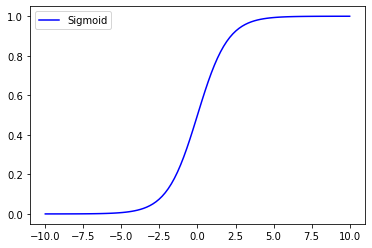

In [143]:
plt.plot(z.T, sigmoid(z.T),"blue", label = 'Sigmoid')
plt.legend()

# tanh

In [144]:
def tanh(c):
    g = (2/(1+ np.power((np.e), -2*c))) - 1
    return g

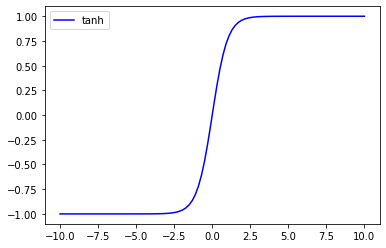

In [145]:
plt.plot(z.T, tanh(z.T), "blue", label = 'tanh')
plt.legend()

# ReLu

In [146]:
def reLu(c):
    cc = np.array([])
    for i in range(len(c)):
        if c[i] < 0:
            cc= np.append(cc,0)
        else:
            cc = np.append(cc,c[i]/10)
    return cc.reshape(100,1)

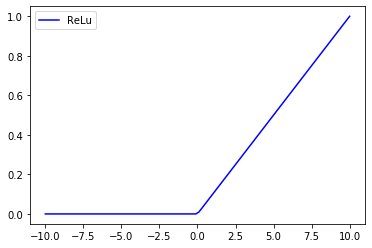

In [147]:
plt.plot(z.T, reLu(z.T), "blue", label = 'ReLu')
plt.legend()

# LeakyReLu

In [148]:
def leakyreLu(c):
    cc = np.array([])
    for i in range(len(c)):
        if c[i] < 0:
            cc = np.append(cc,0.01*c[i])
        else:
            cc = np.append(cc,c[i]/10)
    return cc.reshape(100,1)

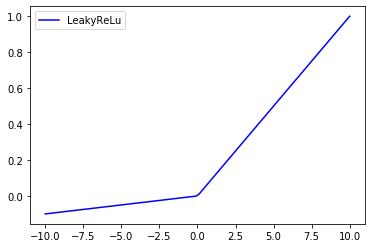

In [149]:
plt.plot(z.T, leakyreLu(z.T), "blue", label = 'LeakyReLu')
plt.legend()

Plotting all the activation functions together

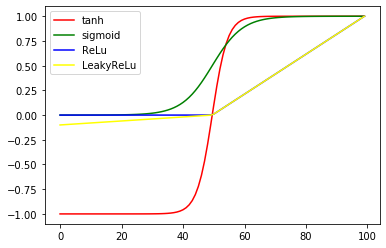

In [150]:
plt.plot(tanh(z.T), "red", label = 'tanh')
plt.plot(sigmoid(z.T), "green", label = 'sigmoid')
plt.plot(reLu(z.T), "blue", label = 'ReLu')
plt.plot(leakyreLu(z.T), "yellow", label = 'LeakyReLu')
plt.legend()
plt.show()

# Plotting the loss functions

In [151]:
y_act = np.zeros(100).reshape(100,1)


# Mean Square Error

In [152]:
def MSE(x,y):
    res = (x - y) ** 2
    return res

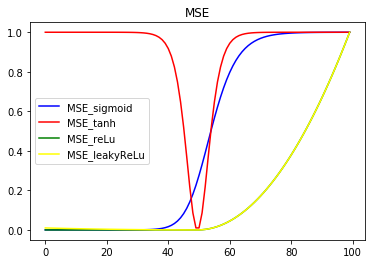

In [153]:
plt.plot(MSE(y_act,sigmoid(z.T)), "blue", label = 'MSE_sigmoid')
plt.plot(MSE(y_act,tanh(z.T)), "red", label = 'MSE_tanh')
plt.plot(MSE(y_act,reLu(z.T)), "green", label = 'MSE_reLu')
plt.plot(MSE(y_act,leakyreLu(z.T)), "yellow", label = 'MSE_leakyReLu')
plt.title('MSE')
plt.legend()
plt.show()

# Hinge Loss

In [154]:
def hinge(x,y):
    l = np.maximum(0, 1-(x*y))
    return l

In [155]:
y_act1 = np.ones(100).reshape(100,1)

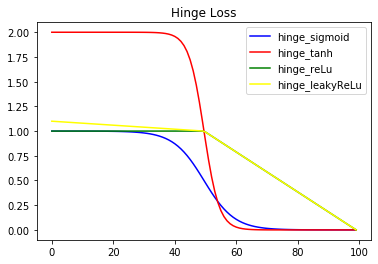

In [156]:
plt.plot(hinge(y_act1,sigmoid(z.T)), "blue", label = 'hinge_sigmoid')
plt.plot(hinge(y_act1,tanh(z.T)), "red", label = 'hinge_tanh')
plt.plot(hinge(y_act1,reLu(z.T)), "green", label = 'hinge_reLu')
plt.plot(hinge(y_act1,leakyreLu(z.T)), "yellow", label = 'hinge_leakyReLu')
plt.title('Hinge Loss')
plt.legend()
plt.show()

# Huber Loss

In [164]:
def huber(x,y):
    delta = 1
    cc = np.array([])
    for i in range(len(x)):
        if (x[i]-y[i])<delta:
            cc = np.append(cc,((x[i] - y[i]) ** 2)*0.5)
        else:
            cc = np.append(cc, delta * np.abs(x[i]-y[i]) + (delta ** 2)*0.5)
    return cc

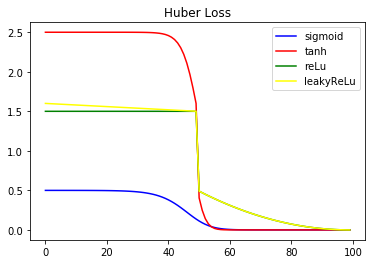

In [165]:
plt.plot(huber(y_act1,sigmoid(z.T)), "blue", label = 'sigmoid')
plt.plot(huber(y_act1,tanh(z.T)), "red", label = 'tanh')
plt.plot(huber(y_act1,reLu(z.T)), "green", label = 'reLu')
plt.plot(huber(y_act1,leakyreLu(z.T)), "yellow", label = 'leakyReLu')
plt.title('Huber Loss')
plt.legend()
plt.show()

# Cross-Entropy Loss

In [159]:
def logLoss(x,yy):
    y = np.array([])
    for i in range(len(yy)):
        if(yy[i]==1):
            y = np.append(y,0.99)
        elif(yy[i]==0):
            y = np.append(y,0.01)
        else:
            y = np.append(y,yy[i])
    
    cc = np.array([])
    for i in range(len(x)):
        if x[i] == 1:
            cc = np.append(cc,-np.log2(y[i]))
        else:
            cc = np.append(cc,-np.log2(1 - y[i]))
    return cc.reshape(100,1)

In [160]:
y_act[:50].fill(1)

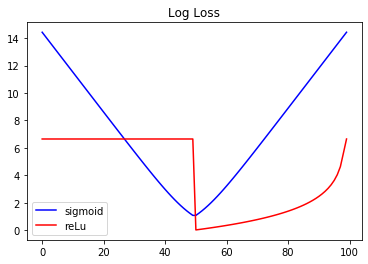

In [161]:
plt.plot(logLoss(y_act,sigmoid(z.T)), "blue", label = 'sigmoid')
plt.plot(logLoss(y_act,reLu(z.T)), "red", label = 'reLu')
plt.title('Log Loss')
plt.legend()
plt.show()